In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [80]:
# konwersja z jedn. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2

In [81]:
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364


In [82]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [83]:
pd.get_dummies(df)

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


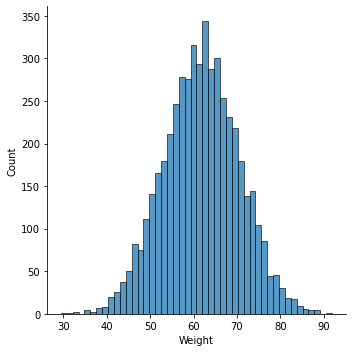

In [84]:
sns.displot(df.query(" Gender=='Female' ").Weight)

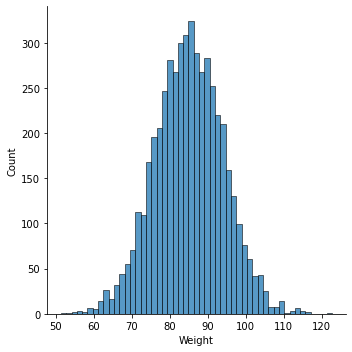

In [85]:
sns.displot(df.query(" Gender=='Male' ").Weight)

In [86]:
df = pd.get_dummies(df)
df

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,109.951620,0,1
1,174.706036,73.777488,0,1
2,188.239668,96.700389,0,1
3,182.196685,100.019305,0,1
4,177.499761,93.795364,0,1
...,...,...,...,...
9995,168.078536,62.171570,1,0
9996,170.350573,77.667230,1,0
9997,162.224700,58.397872,1,0
9998,175.346978,74.478392,1,0


In [87]:
# usunięcie nadmiarowej kolumny
del(df["Gender_Male"])

In [88]:
# Dla Gender:
# 0 - mezczyzni
# 1 - kobiety
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df.sample(n=5)

,Height,Weight,Gender
664,180.027702,84.699920,0
4986,181.976824,86.392403,0
9743,169.241280,64.942743,1
4743,175.594497,76.284439,0
5622,172.296962,81.949923,1


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [90]:
model = LinearRegression()
model.fit(df[ ["Height","Gender"] ] , df.Weight)

LinearRegression()

In [91]:
# obliczanie predykcji dla nowej próbki danych
model.predict([ [192, 0] ])

array([102.84294991])

In [92]:
# obliczanie predykcji dla nowych próbek danych
model.predict([ [192, 0] , [188, 0], [154, 1] ])

array([102.84294991,  98.56453815,  53.38998795])

In [93]:
model.coef_ , model.intercept_

(array([ 1.06960294, -8.80805024]), -102.52081454490089)

In [94]:
pd.DataFrame(model.coef_, ["Height","Gender"])

,0
Height,1.069603
Gender,-8.808050


In [95]:
height = 192
gender = 0 # mezczyzna
model.intercept_ + model.coef_[0]*height + model.coef_[1]*gender

102.84294990633599

In [96]:
r2_score( df.Weight, model.predict(df[ ["Height","Gender"] ]) )

0.9027481729220092

### Predykcja cen mieszkań - W-wa/Mokotów

In [97]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


In [98]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


In [99]:
df.query(" rok_budowy>2021 ")

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
182,46p8c,531400,10,2,1,49.20,2022
722,46lrK,532000,10,2,2,49.00,2022
723,46lrM,675000,10,3,1,66.00,2022
817,44G7p,990000,4,3,1,71.41,2022
1084,46ikq,543045,10,2,2,48.85,2022
1134,46hyb,369063,10,2,1,27.95,2022
1300,46fCx,531400,10,2,1,49.20,2022
1301,46fCu,367999,10,1,1,28.50,2022
1616,46b1l,657260,10,3,1,62.79,2022
1618,46b1k,528516,10,2,1,47.67,2022


<AxesSubplot:>

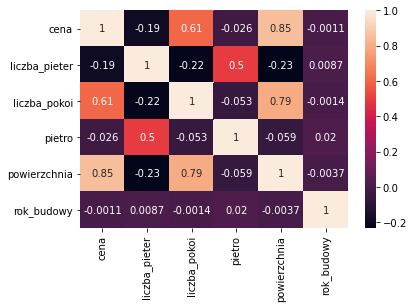

In [100]:
sns.heatmap( df.corr() , annot=True)

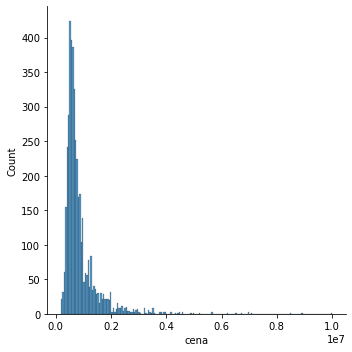

In [101]:
sns.displot(df.cena)

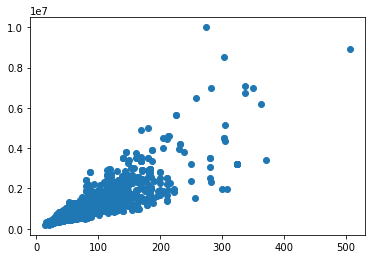

In [102]:
plt.scatter(df.powierzchnia, df.cena)

In [103]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


In [104]:
min_ = df.describe().loc["min","cena"] 
q3_ = df.describe().loc["75%","cena"] 
min_, q3_

(187330.0, 939900.0)

In [105]:
df1 = df[ (df.cena>=min_)&(df.cena<=q3_) ]

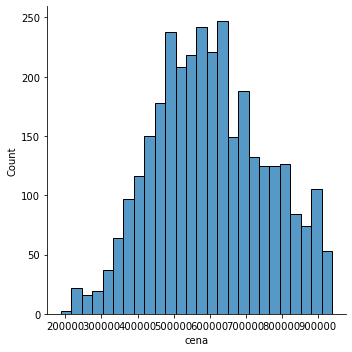

In [106]:
sns.displot(df1.cena)

In [107]:
df1.shape[0] / 5

647.2

In [108]:
df1 = df1.sample(frac=1, random_state=0)

In [109]:
df_test = df1[:650]
df_train = df1[650:]

In [110]:
df_test.shape, df_train.shape

((650, 7), (2586, 7))

In [111]:
X_train = df_train.iloc[ : , 2:]
X_test = df_test.iloc[ : , 2:]

y_train = df_train["cena"]
y_test = df_test["cena"]

In [112]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6830036031232325
TEST: -28.89216091102125


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
df1.head()

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
3702,44sdF,729000,3,3,3,63.00,1989
611,46mKS,513000,4,3,1,47.40,1970
3003,45yeO,699999,10,3,0,64.00,1974
1540,45Z3U,720000,4,2,0,60.00,2000
2770,442pc,599000,3,3,2,63.84,1984


In [115]:
X = df1.iloc[: , 2: ]
y = df1.cena 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [118]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("TEST:", model.score(X_test, y_test))

TRAIN: 0.6563766469247977
TEST: 0.6995655705259888
